In [7]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import array_to_latex

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

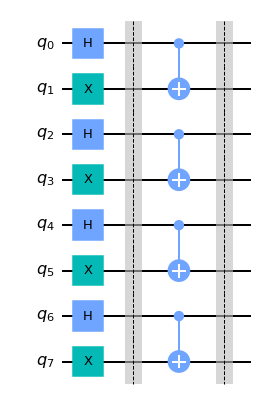

In [9]:
def diffractiveBeam(n_qubits):
    #circuit
    qc = QuantumCircuit(n_qubits)
    
    #DOE
    for i in range(n_qubits):
        if i % 2 == 1:
            qc.x(i)
        else:
            qc.h(i)
    qc.barrier()

    # CNOT
    [qc.cx(i, i+1) for i in range(0, n_qubits, 2)]
    qc.barrier()
    
    return qc

my_circuit = diffractiveBeam(8)
my_circuit.draw()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


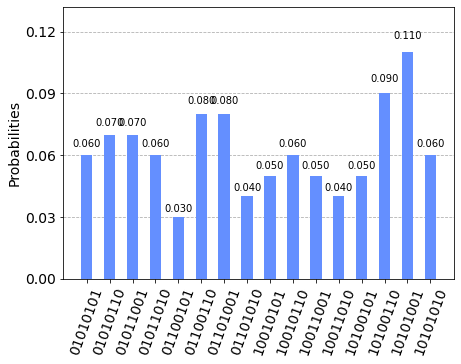

In [8]:
svsim = Aer.get_backend('statevector_simulator')
job = execute(my_circuit,svsim,shots=100)
result = job.result()
counts = result.get_counts(my_circuit)
plot_histogram(counts)